# 

## Import statements

In [78]:
import pandas as pd
from astropy.units import Quantity
import matplotlib.pyplot as plt
import numpy as np

from common import xcs3p_colour, xcs_cosmo
import xga
xga.NUM_CORES = 10
from xga.samples import ClusterSample
from xga.sources import GalaxyCluster
from xga.imagetools.misc import physical_rad_to_pix
from xga.utils import r500 as r500_unit
from xga.imagetools.psf import rl_psf

## 

In [2]:
chosen_names = ['SDSSXCS-55', 'SDSSXCS-6955']

In [3]:
xcs3p = pd.read_csv("../sample_files/xcs3p_sdssrm_vol_lim_temperr_25%_clusters.csv")
xcs3p_r2500 = pd.read_csv("../sample_files/xcs3p_sdssrm_r2500_props_nonvol_lim_temperr_100%_clusters.csv")
example_clusters = xcs3p[xcs3p['name'].isin(chosen_names)]
example_clusters = example_clusters.join(xcs3p_r2500, rsuffix='r2500')
example_clusters = example_clusters.reset_index(drop=True).reindex([1, 0])
example_clusters

name  MEM_MATCH_ID    xapa_ra   xapa_dec         z      r500  \
1    SDSSXCS-55            55  227.55039  33.516138  0.119238  9.587699   
0  SDSSXCS-6955          6955   36.45483  -5.894148  0.222771  3.108955   

        Tx       Tx-       Tx+      Lx52  ...  Tx+r2500  Lx52r2500  \
1  6.69605  0.079980  0.079954  2.771536  ...  0.359009   0.059654   
0  2.41024  0.299063  0.392930  0.209242  ...  0.029345   3.631483   

   Lx52-r2500  Lx52+r2500   Lxr2500  Lx-r2500  Lx+r2500 richnessr2500  \
1    0.005657    0.009455  0.144188  0.019525  0.027116     23.420599   
0    0.017078    0.016109  9.755187  0.059563  0.051672     31.444715   

  richness_errr2500              XCS_NAMEr2500  
1          3.219053  XMMXCS J084110.5+003736.8  
0          3.023459  XMMXCS J010649.3+010324.7  

[2 rows x 36 columns]

In [33]:
# Reading out the relevant values into arrays just for ease of passing into the ClusterSample object
ra = example_clusters['xapa_ra'].values
dec = example_clusters['xapa_dec'].values
z = example_clusters['z'].values
# Not using the IAU names in XCS_NAME column, its easier for me to use the name based on redMaPPer ID
n = example_clusters['name'].values
# In arcminutes, ClusterSample declaration will convert to kpc using the provided cosmology
r500 = Quantity(example_clusters['r500'].values, 'arcmin')
r2500 = Quantity(example_clusters['r2500'].values, 'arcmin')
# Not likely to use richness in this notebook, but I'm putting it in the sample object anyway
r = example_clusters['richness'].values
r_err = example_clusters['richness_err'].values

# Declaring the actual ClusterSample instance for the XCS sample
examp_srcs = ClusterSample(ra, dec, z, n, r500=r500, r2500=r2500, richness=r, richness_err=r_err, 
                           cosmology=xcs_cosmo, load_fits=True, use_peak=False, clean_obs=True, 
                           clean_obs_reg='r500', clean_obs_threshold=0.7)

/mnt/pact/dt237/code/PycharmProjects/XGA/xga/sources/base.py:308: UserWarning: SDSSXCS-55 spectrum /mnt/lustre/projects/astro/general/dt237/mass_papers/XCS-Mass-Paper-I-Analysis/notebooks/xga_output/0149880101/0149880101_pn_SDSSXCS-55_ra227.55039_dec33.516138_ri0.08579161500459656_ro0.09183327803308927_grpTrue_mincnt5_ident85228453_14_spec.fits cannot be loaded in due to a mismatch in available ancillary files
  self._existing_xga_products(load_fits)


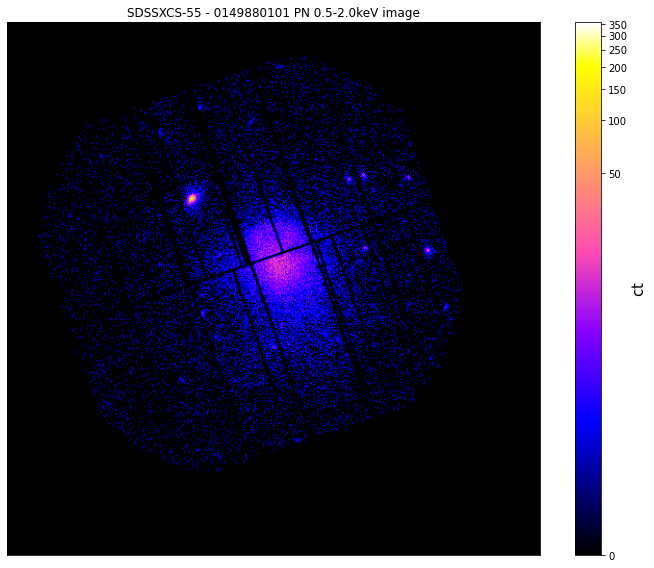

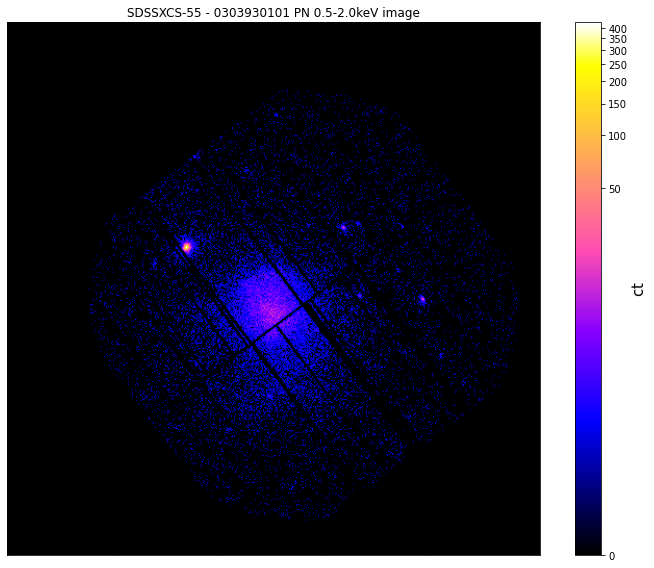

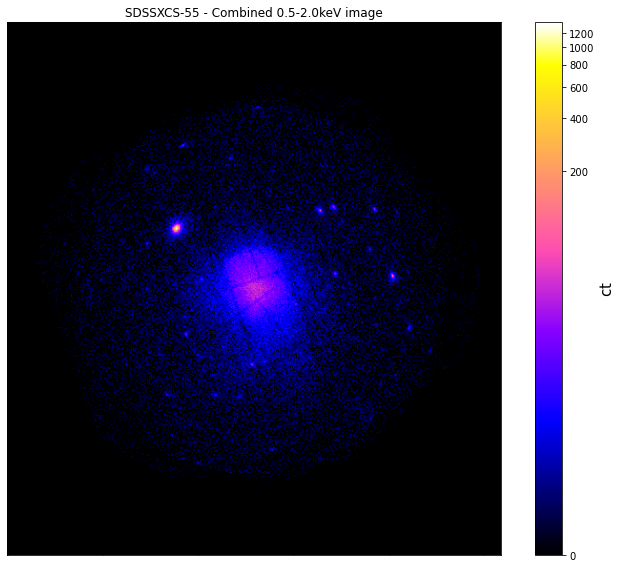

In [64]:
no_cust_reg_src = GalaxyCluster(ra[0], dec[0], z[0], n[0], r500=r500[0], r2500=r2500[0], richness=r[0], 
                                richness_err=r_err[0], cosmology=xcs_cosmo, load_fits=True, use_peak=False, 
                                clean_obs=True, clean_obs_reg='r500', clean_obs_threshold=0.7)

no_cust_reg_src._interloper_regions = [r for r in no_cust_reg_src._interloper_regions if r.visual['color'] != 'white']
no_cust_reg_src._other_regions['0149880101'] = [r for r in no_cust_reg_src.get_interloper_regions()['0149880101'] if r.visual['color'] != 'white']
no_cust_reg_src._other_regions['0303930101'] = [r for r in no_cust_reg_src.get_interloper_regions()['0303930101'] if r.visual['color'] != 'white']


im = no_cust_reg_src.get_images('0149880101', 'pn')[0]
im.view()
no_cust_reg_src._interloper_masks['0149880101'] = no_cust_reg_src._generate_interloper_mask(im)

im = no_cust_reg_src.get_images('0303930101', 'pn')[0]
im.view()
no_cust_reg_src._interloper_masks['0303930101'] = no_cust_reg_src._generate_interloper_mask(im)

im = no_cust_reg_src.get_combined_images()
im.view()
no_cust_reg_src._interloper_masks['combined'] = no_cust_reg_src._generate_interloper_mask(im)

In [5]:
examp_srcs.info()


-----------------------------------------------------
Number of Sources - 2
Redshift Information - True
Sources with ≥1 detection - 2 [100%]
-----------------------------------------------------



In [6]:
print(examp_srcs.names)
print(examp_srcs.r500)
print(examp_srcs.r2500)

['SDSSXCS-55' 'SDSSXCS-6955']
[1237.5931434   668.99367644] kpc
[105.53026104 293.85736675] kpc


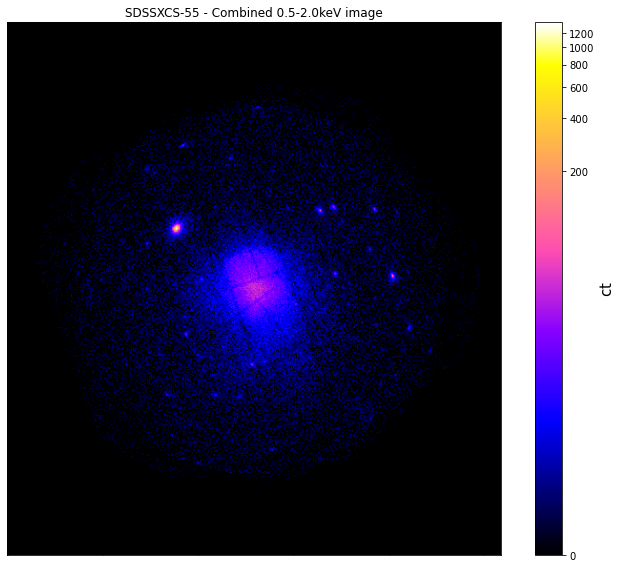

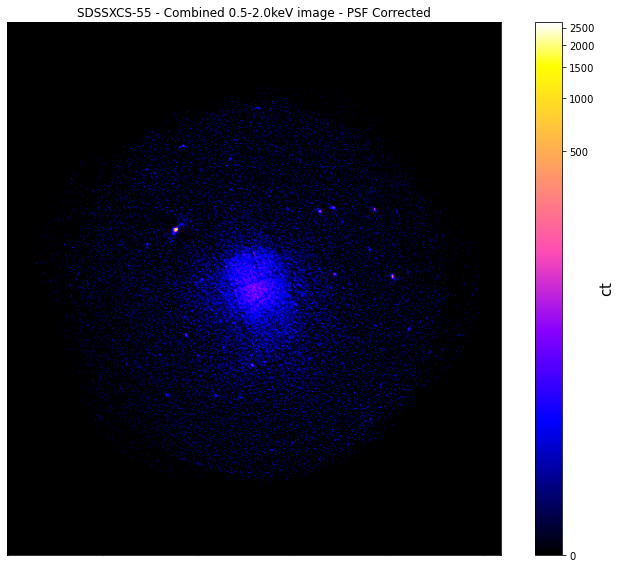


-----------------------------------------------------
Source Name - SDSSXCS-55
User Coordinates - (227.55039, 33.516138) degrees
X-ray Peak - (227.55039, 33.516138) degrees
nH - 0.0149 1e+22 / cm2
Redshift - 0.119
XMM ObsIDs - 2
PN Observations - 2
MOS1 Observations - 2
MOS2 Observations - 2
On-Axis - 2
With regions - 2
Total regions - 68
Obs with 1 detection - 2
Obs with >1 matches - 0
Images associated - 18
Exposure maps associated - 12
Combined Ratemaps associated - 2
Spectra associated - 24
Fitted Models - constant*tbabs*apec | constant*tbabs*apec | constant*tbabs*apec
R500 - 1237.5931434003808 kpc
R500 SNR - 306.02
R2500 - 105.53026103767782 kpc
R2500 SNR - 26.05
Richness - 99.80225±3.735475
R500 Tx - 6.71±0.09[keV]
R500 0.5-2.0keV Lx - 2.94±0.015[e+44 erg/s]
-----------------------------------------------------



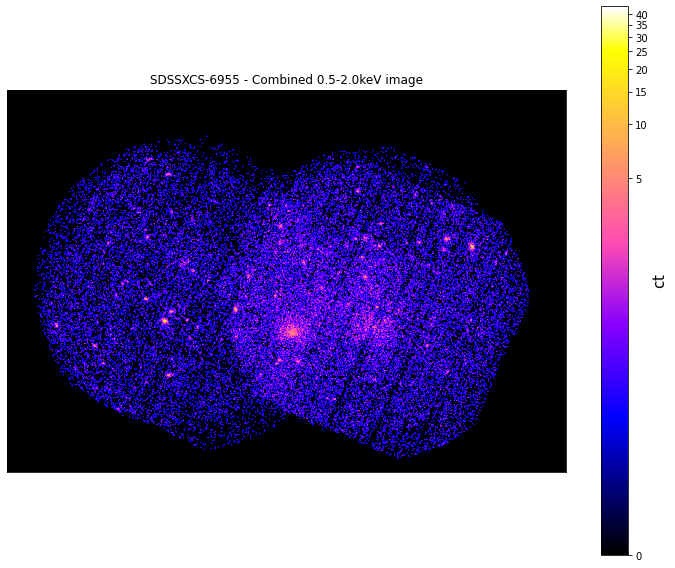

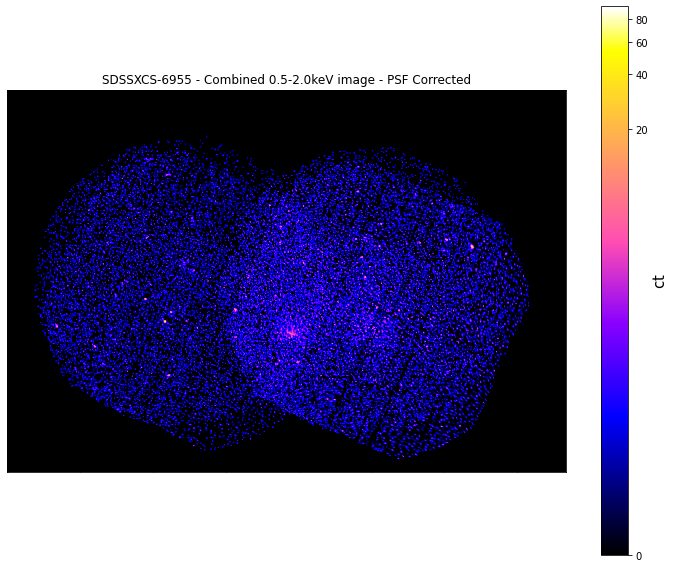


-----------------------------------------------------
Source Name - SDSSXCS-6955
User Coordinates - (36.45483, -5.894147599999998) degrees
X-ray Peak - (36.45483, -5.894147599999998) degrees
nH - 0.0249 1e+22 / cm2
Redshift - 0.223
XMM ObsIDs - 2
PN Observations - 2
MOS1 Observations - 2
MOS2 Observations - 2
On-Axis - 0
With regions - 2
Total regions - 61
Obs with 1 detection - 2
Obs with >1 matches - 0
Images associated - 18
Exposure maps associated - 12
Combined Ratemaps associated - 2
Spectra associated - 24
Fitted Models - constant*tbabs*apec | constant*tbabs*apec | constant*tbabs*apec
R500 - 668.9936764375799 kpc
R500 SNR - 41.3
R2500 - 293.8573667527789 kpc
R2500 SNR - 24.97
Richness - 32.131187±2.8320866
R500 Tx - 2.18±0.305[keV]
R500 0.5-2.0keV Lx - 0.25±0.025[e+44 erg/s]
-----------------------------------------------------



In [7]:
for src in examp_srcs:
    src.get_combined_images().view()
    src.get_combined_images(psf_corr=True).view()
    src.info()

In [22]:
examp_srcs[0].obs_ids

['0149880101', '0303930101']

In [23]:
examp_srcs[1].obs_ids

['0677600131', '0404965201']

In [9]:
examp_srcs[1].matched_regions

{'0677600131': <EllipseSkyRegion(<SkyCoord (ICRS): (ra, dec) in deg
     (36.45719413, -5.8935039)>, width=0.04033076685274979 deg, height=0.036413375260336514 deg, angle=12.136122089608449 deg)>,
 '0404965201': <EllipseSkyRegion(<SkyCoord (ICRS): (ra, dec) in deg
     (36.45482991, -5.89414766)>, width=0.04467862927526675 deg, height=0.035625598999729544 deg, angle=-3.9225726364003193 deg)>}

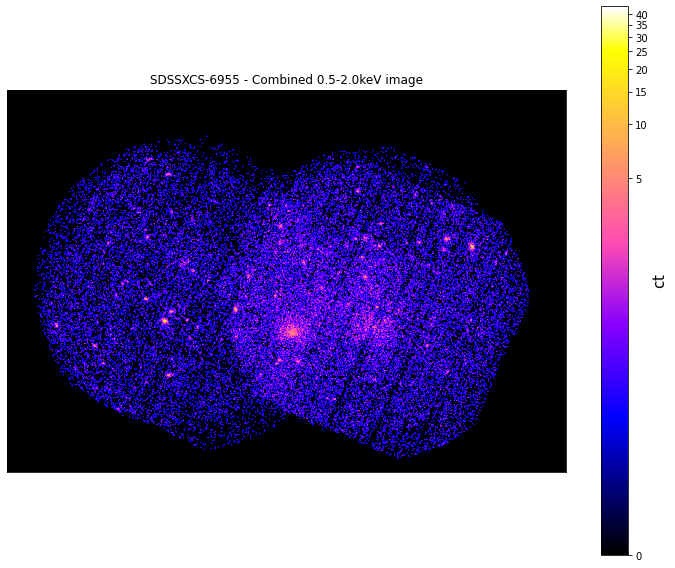

In [21]:
rt_two.image.view()

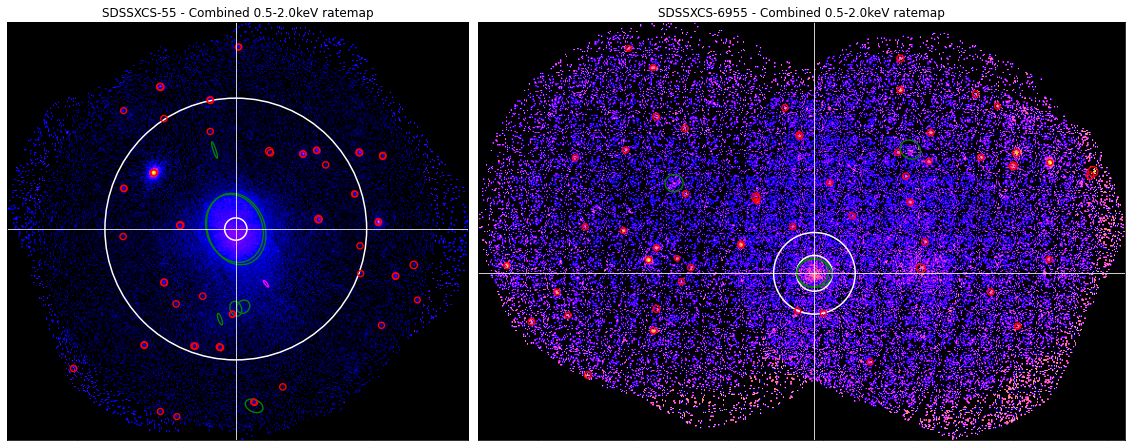

In [66]:
fig_size = (16.4, 5.8)
fig = plt.figure(figsize=fig_size)

rt_one = examp_srcs[0].get_combined_ratemaps()

src_one_all_reg = {o: r + [examp_srcs[0].matched_regions[o]] 
                   for o, r in no_cust_reg_src.get_interloper_regions().items()}
rt_one.regions = src_one_all_reg

rt_two = examp_srcs[1].get_combined_ratemaps()
src_two_all_reg = {o: r + [examp_srcs[1].matched_regions[o]] 
                   for o, r in examp_srcs[1].get_interloper_regions().items()}
rt_two.regions = src_two_all_reg

plt_buff = 1
tot_x = rt_one.shape[1] + rt_two.shape[1] + plt_buff

src_one_r500 = physical_rad_to_pix(rt_one, examp_srcs[0].r500, examp_srcs[0].ra_dec, examp_srcs[0].redshift, 
                                   xcs_cosmo).value
src_one_r2500 = physical_rad_to_pix(rt_one, examp_srcs[0].r2500, examp_srcs[0].ra_dec, examp_srcs[0].redshift, 
                                    xcs_cosmo).value
src_two_r500 = physical_rad_to_pix(rt_two, examp_srcs[1].r500, examp_srcs[1].ra_dec, examp_srcs[1].redshift, 
                                   xcs_cosmo).value
src_two_r2500 = physical_rad_to_pix(rt_two, examp_srcs[1].r2500, examp_srcs[1].ra_dec, examp_srcs[1].redshift, 
                                    xcs_cosmo).value

rt_one_ax = fig.add_axes((0, 0, rt_one.shape[1]/tot_x, 1))
rt_one.get_view(rt_one_ax, examp_srcs[0].ra_dec, zoom_in=True, view_regions=True, 
                radial_bins_pix=[src_one_r2500, src_one_r500])

bodge_x = 30
rt_two_ax = fig.add_axes(((rt_one.shape[1] + plt_buff - bodge_x)/tot_x, 0, rt_two.shape[1]/tot_x, 1))
rt_two.get_view(rt_two_ax, examp_srcs[1].ra_dec, zoom_in=True, view_regions=True, 
                radial_bins_pix=[src_two_r2500, src_two_r500])

plt.savefig('../outputs/figures/demo_clusters_RT.pdf', bbox_inches='tight')
plt.show()

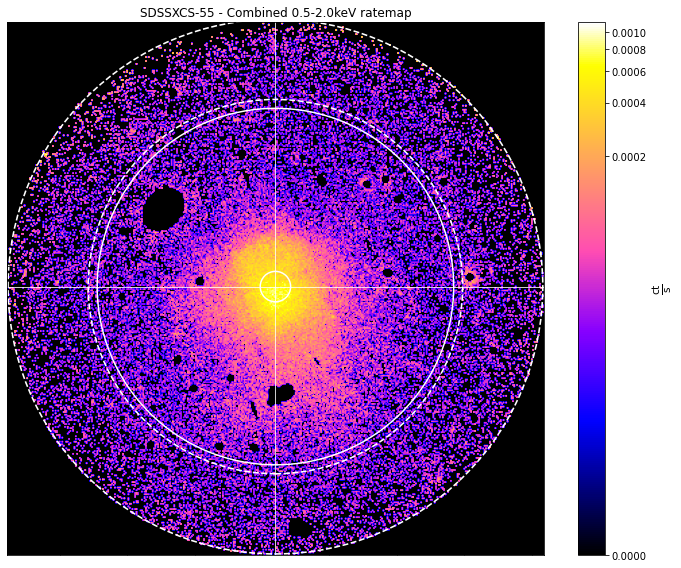

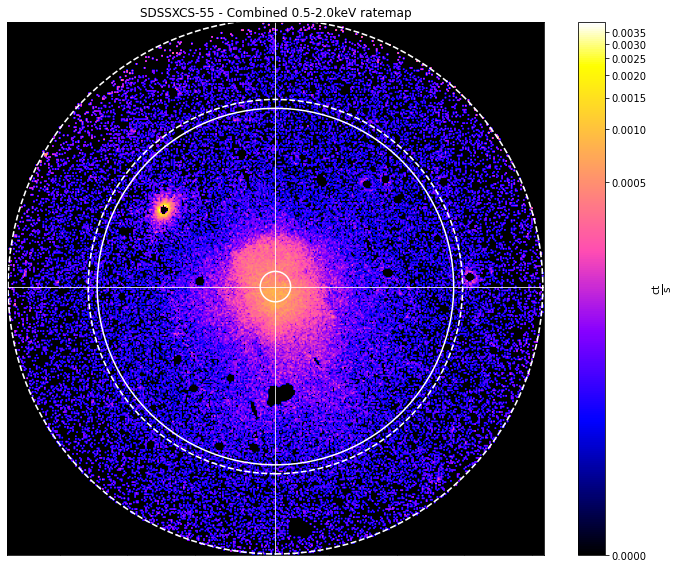

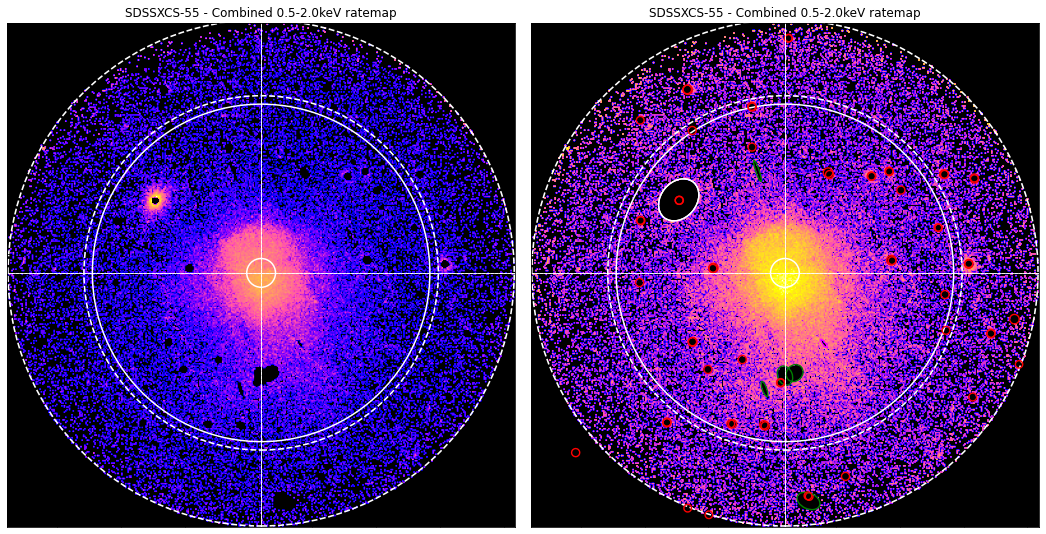

In [70]:
# rt_one.view(examp_srcs[0].ra_dec, examp_srcs[0].get_mask('r500')[0], zoom_in=True)
rt_one.view(examp_srcs[0].ra_dec, examp_srcs[0].get_custom_mask(examp_srcs[0].r500*1.5), zoom_in=True, 
            radial_bins_pix=[src_one_r2500, src_one_r500], back_bin_pix=src_one_r500*np.array([1.05, 1.5]))
rt_one_no_cust = no_cust_reg_src.get_combined_ratemaps()
rt_one_no_cust.view(examp_srcs[0].ra_dec, no_cust_reg_src.get_custom_mask(examp_srcs[0].r500*1.5), zoom_in=True, 
            radial_bins_pix=[src_one_r2500, src_one_r500], back_bin_pix=src_one_r500*np.array([1.05, 1.5]))

fig = plt.figure(figsize=(15, 7))
no_cust_m_ax = fig.add_axes((0, 0, 0.5, 1))
rt_one_no_cust.get_view(no_cust_m_ax, Quantity([examp_srcs[0].peak, examp_srcs[0].ra_dec]), 
                 no_cust_reg_src.get_custom_mask(examp_srcs[0].r500*1.5), zoom_in=True, 
                 radial_bins_pix=[src_one_r2500, src_one_r500], back_bin_pix=src_one_r500*np.array([1.05, 1.5]))

cust_m_ax = fig.add_axes((0.485, 0, 0.5, 1))

rt_one.regions = examp_srcs[0].get_interloper_regions()
rt_one.get_view(cust_m_ax, Quantity([examp_srcs[0].peak, examp_srcs[0].ra_dec]), 
                 examp_srcs[0].get_custom_mask(examp_srcs[0].r500*1.5), zoom_in=True, view_regions=True,
                 radial_bins_pix=[src_one_r2500, src_one_r500], back_bin_pix=src_one_r500*np.array([1.05, 1.5]))
# plt.tight_layout()
plt.savefig("../outputs/figures/demo_cluster_mask.pdf", bbox_inches='tight')
plt.show()

In [ ]:
rl_psf(examp_srcs, bins=10)

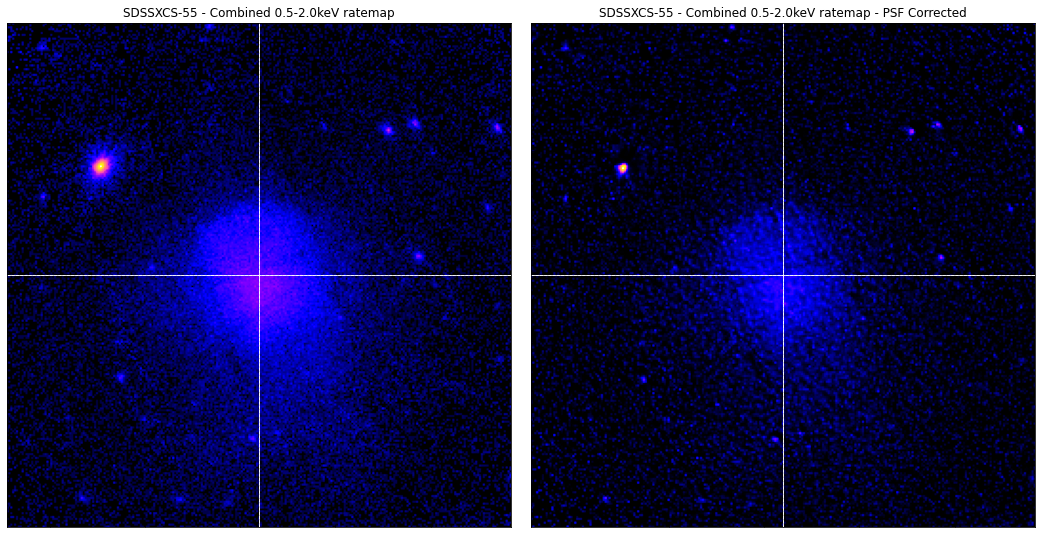

In [83]:
rt_one_psfc = examp_srcs[0].get_combined_ratemaps(psf_corr=True, psf_bins=10)

hh = physical_rad_to_pix(rt_one_psfc, examp_srcs[0].r500, examp_srcs[0].ra_dec, examp_srcs[0].redshift, xcs_cosmo)
pix_coord = rt_one_psfc.coord_conv(examp_srcs[0].ra_dec, 'pix')
x_lims = Quantity([pix_coord[0]-hh, pix_coord[0]+hh]).value
y_lims = Quantity([pix_coord[1]-hh, pix_coord[1]+hh]).value

fig = plt.figure(figsize=(15, 7))
normal_ax = fig.add_axes((0, 0, 0.5, 1))
rt_one.get_view(normal_ax, Quantity([examp_srcs[0].peak, examp_srcs[0].ra_dec]), zoom_in=True, 
                manual_zoom_xlims=x_lims, manual_zoom_ylims=y_lims)

psf_corr_ax = fig.add_axes((0.485, 0, 0.5, 1))
rt_one_psfc.get_view(psf_corr_ax, Quantity([examp_srcs[0].peak, examp_srcs[0].ra_dec]), zoom_in=True,
                 manual_zoom_xlims=x_lims, manual_zoom_ylims=y_lims)
# plt.tight_layout()
plt.savefig("../outputs/figures/demo_cluster_psfcorr.pdf", bbox_inches='tight')
plt.show()

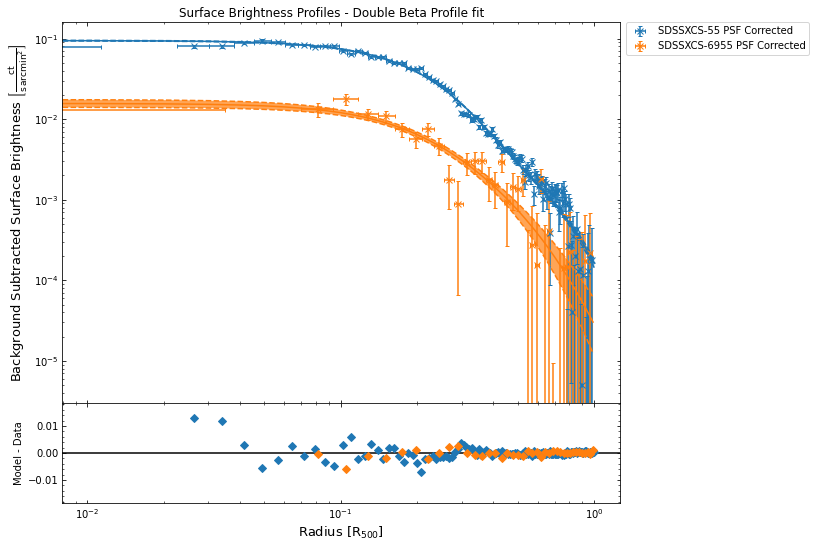

In [87]:
src_one_bp = examp_srcs[0].get_profiles('combined_brightness')
src_one_bp.x_norm = examp_srcs[0].r500 / Quantity(1, r500_unit)
src_two_bp = examp_srcs[1].get_profiles('combined_brightness')
src_two_bp.x_norm = examp_srcs[1].r500 / Quantity(1, r500_unit)

(src_one_bp + src_two_bp).view(normalise_x=True, model='double_beta', 
                               save_path='../outputs/figures/demo_clusters_sb.pdf')

In [ ]:
src_one_dp = examp_srcs[0].get_density_profiles()
src_one_dp.x_norm = examp_srcs[0].r500 / Quantity(1, r500)
src_two_dp = examp_srcs[1].get_density_profiles()
src_two_dp.x_norm = examp_srcs[1].r500 / Quantity(1, r500)

(src_one_dp + src_two_dp).view(normalise_x=True)